In [110]:
from ema_workbench import Scenario, Policy, MultiprocessingEvaluator, ema_logging, load_results
from ema_workbench.analysis import prim
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.em_framework.evaluators import BaseEvaluator

from ema_workbench.em_framework.optimization import (HyperVolume,
                                                     EpsilonProgress)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ema_workbench.analysis import parcoords
import seaborn as sns

In [2]:
dike_model, planning_steps = get_model_for_problem_formulation("Gorssel")

# Scenario selection

In [3]:
ACTOR = "genscen_Gorssel_50000_09-06-2021-01-38-16.tar.gz"
experiments, outcomes = load_results("data/generated/" + ACTOR)
outcomes_df = pd.DataFrame(outcomes)

In [4]:
outcomes_df.columns.values.tolist()

['Difference in Expected Annual Damage Gorssel-Deventer',
 'Difference in Expected Number of Deaths Gorssel-Deventer',
 'Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Total Costs of Policies']

In [5]:
DAMAGE = outcomes_df.columns[2]
DEATHS = outcomes_df.columns[3]
COSTS = outcomes_df.columns[4]

In [6]:
results = pd.concat([experiments, outcomes_df], axis=1)

In [7]:
worst_damage_df = results.loc[results[DAMAGE] > np.percentile(a=outcomes[DAMAGE], q=90)]
worst_deaths_df = results.loc[results[DEATHS] > np.percentile(a=outcomes[DEATHS], q=90)]
worst_cost_df = results.loc[results[COSTS] > np.percentile(a=outcomes[COSTS], q=90)]
worst_ix =set(worst_damage_df["scenario"].tolist()) & set(worst_deaths_df["scenario"].tolist()) & set(worst_cost_df["scenario"].tolist())

In [8]:
worst_case = results.iloc[list(worst_ix)].sample(n=1, random_state=1)

In [9]:
best_damage_df = results.loc[results[DAMAGE] <= np.percentile(a=outcomes[DAMAGE], q=10)]
best_deaths_df = results.loc[results[DEATHS] <= np.percentile(a=outcomes[DEATHS], q=10)]
best_cost_df = results.loc[results[COSTS] <= np.percentile(a=outcomes[COSTS], q=10)]
best_ix = set(best_damage_df["scenario"].tolist()) & set(best_deaths_df["scenario"].tolist()) & set(best_cost_df["scenario"].tolist())

In [10]:
best_case = results.iloc[list(best_ix)].sample(n=1, random_state=1)

In [11]:
len(set(results["scenario"].tolist()) - set(best_damage_df["scenario"].tolist()) - set(best_deaths_df["scenario"].tolist()) - set(best_cost_df["scenario"].tolist()) - set(worst_damage_df["scenario"].tolist()) - set(worst_deaths_df["scenario"].tolist()) - set(worst_cost_df["scenario"].tolist()) )

30946

In [12]:
middleground = set(results["scenario"].tolist()) - set(best_damage_df["scenario"].tolist()) - set(best_deaths_df["scenario"].tolist()) - set(best_cost_df["scenario"].tolist()) - set(worst_damage_df["scenario"].tolist()) - set(worst_deaths_df["scenario"].tolist()) - set(worst_cost_df["scenario"].tolist())

In [13]:
results.iloc[list(middleground)]

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Total Costs of Policies
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,94.0,...,0.0,0.0,0,Policy 0,dikesnet,-2930.727911,-2.443679e-06,9.233263e+06,0.004710,1.170471e+09
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.0,...,0.0,0.0,1,Policy 0,dikesnet,-761.528933,-4.818763e-07,7.670043e+07,0.048534,8.411319e+08
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,118.0,...,0.0,0.0,2,Policy 0,dikesnet,-989.243308,-7.561254e-07,1.770776e+07,0.008808,8.851280e+08
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,60.0,...,0.0,0.0,3,Policy 0,dikesnet,-2033.608427,-1.979461e-06,1.397205e+07,0.008365,1.210445e+09
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,35.0,...,0.0,0.0,6,Policy 0,dikesnet,-1605.437106,-1.998324e-06,7.055392e+06,0.005666,9.590660e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,80.0,...,0.0,0.0,49994,Policy 0,dikesnet,-2991.995273,-3.699884e-06,2.388620e+07,0.016028,7.249075e+08
49995,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,79.0,...,0.0,0.0,49995,Policy 0,dikesnet,-8720.108753,-7.120719e-06,9.918798e+06,0.005282,7.280721e+08
49997,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,120.0,...,0.0,0.0,49997,Policy 0,dikesnet,-846.480657,-3.498559e-07,8.525669e+07,0.035237,1.008833e+09
49998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,49998,Policy 0,dikesnet,-5219.987758,-3.757513e-06,1.133016e+07,0.005143,9.024871e+08


In [14]:
middle_damage_df = results.loc[(results[DAMAGE] > np.percentile(a=outcomes[DAMAGE], q=45)) & (results[DAMAGE] <= np.percentile(a=outcomes[DAMAGE], q=55))]
middle_deaths_df = results.loc[(results[DEATHS] > np.percentile(a=outcomes[DEATHS], q=45)) & (results[DEATHS] <= np.percentile(a=outcomes[DEATHS], q=55))]
middle_cost_df = results.loc[(results[COSTS] > np.percentile(a=outcomes[COSTS], q=45)) & (results[COSTS] <= np.percentile(a=outcomes[COSTS], q=55))]
middle_ix =set(middle_damage_df["scenario"].tolist()) & set(middle_deaths_df["scenario"].tolist()) & set(middle_cost_df["scenario"].tolist())

In [15]:
middle_case = results.iloc[list(middle_ix)].sample(n=1, random_state=1)

In [16]:
uncertainties =list(dike_model.uncertainties._data.keys())

In [17]:
middle_case.loc[:, uncertainties]

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,...,2_RfR 2,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2
5569,3.5,3.5,2.5,82.0,108.796933,0.175097,1.0,274.649688,0.546471,10.0,...,1.0,5.0,5.0,3.0,8.0,1.0,10.0,7.0,5.0,4.0


In [18]:
selected = pd.concat([middle_case.loc[:, uncertainties], best_case.loc[:, uncertainties], worst_case.loc[:, uncertainties]], axis=0)

In [19]:
scenarios = [Scenario(f"{index}", **row) for index, row in selected.iterrows()]

# Optimisation

In [25]:
ema_logging.log_to_stderr(ema_logging.INFO)

def optimize(scenario, nfe, model, converge_metrics, epsilons):


    with MultiprocessingEvaluator(model) as evaluator:
        results, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
                                     convergence=convergence_metrics,
                                     epsilons=epsilons,
                                     reference=scenario)
    return results, convergence


results = []
for scenario in scenarios:
    # need to pick better hypervolume limits
    convergence_metrics = [HyperVolume(minimum=[0,0,0,0], maximum=[3, 2,1.01,1.01]),
                           EpsilonProgress()]
    epsilons = [1e3] * len(dike_model.outcomes)
    nfe = 1e4
    nfe = 10
    
    results.append(optimize(scenario, nfe, dike_model, convergence_metrics, epsilons))


[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10 nfe
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool
[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10 nfe
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool
[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10 nfe
[MainProcess/INFO] optimization completed, found 2 solutions
[MainProcess/INFO] terminating pool


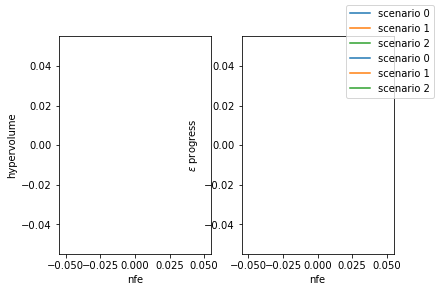

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
for i, (_, convergence) in enumerate(results):
    ax1.plot(convergence.nfe, convergence.hypervolume, label=f'scenario {i}')
    ax2.plot(convergence.nfe, convergence.epsilon_progress, label=f'scenario {i}')

ax1.set_ylabel('hypervolume')
ax1.set_xlabel('nfe')
ax2.set_ylabel('$\epsilon$ progress')
ax2.set_xlabel('nfe')
fig.legend()
plt.show()

In [106]:
outcomes_df= pd.DataFrame()

cases= {0: "middle case", 1:"best case", 2: "worst case"}

for i, (result, _) in enumerate(results):
    result["scenario"] = cases[i]
    outcomes_df = pd.concat([outcomes_df, result], axis=0)

In [107]:
outcomes_df

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Total Costs of Policies,scen,case,scenario
0,0,0,0,0,0,0,0,4,10,1,0,0,3,0.000000e+00,0.000000,1.075036e+09,0,middle case,middle case
0,0,1,0,0,0,0,4,4,0,1,4,8,8,0.000000e+00,0.000000,1.004140e+09,1,best case,best case
0,0,1,0,0,0,0,0,10,2,1,2,4,4,0.000000e+00,0.000000,1.605228e+09,2,worst case,worst case
1,1,0,0,0,0,0,3,0,0,5,4,5,4,6.515639e+07,0.004222,1.592584e+09,2,worst case,worst case


In [94]:
outcomes = [outcome.name for outcome in dike_model.outcomes]

In [95]:
outcomes = outcomes[2:]

In [96]:
policyoutcomes = outcomes_df.loc[:, outcomes]

In [97]:
policyoutcomes

,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Total Costs of Policies
0,0.000000e+00,0.000000,1.075036e+09
0,0.000000e+00,0.000000,1.004140e+09
0,0.000000e+00,0.000000,1.605228e+09
1,6.515639e+07,0.004222,1.592584e+09


Below we plot per scenario 

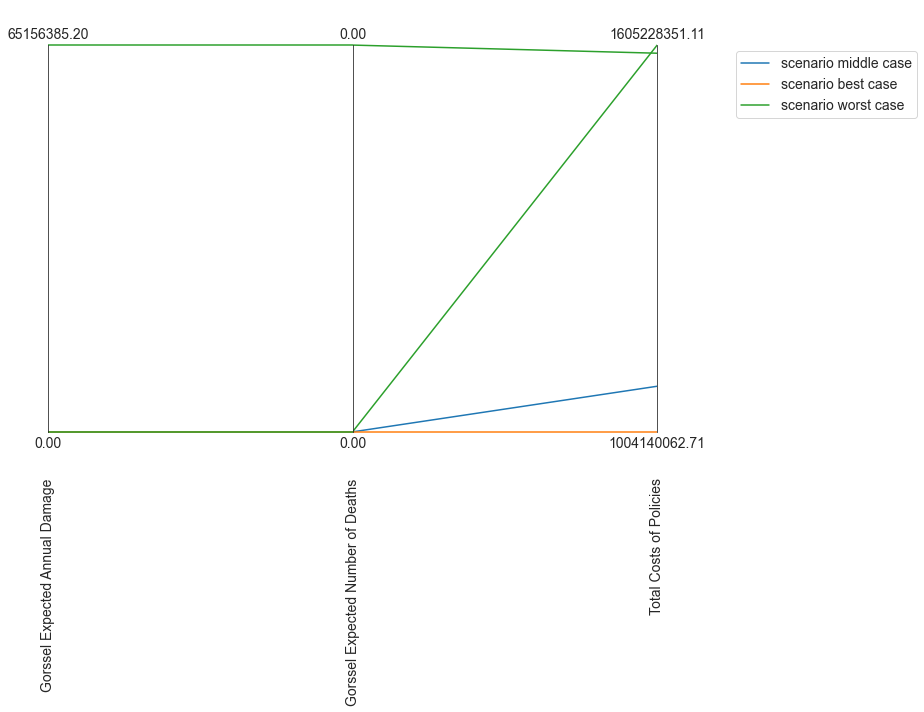

In [108]:
colors = iter(sns.color_palette())
limits = parcoords.get_limits(policyoutcomes)

# limits.loc[0, ['inertia', 'reliability']] = 1
# limits.loc[0, 'max_P'] = 4 # max over results based on quick inspection not shown here
# limits.loc[0, 'utility'] = 1 # max over results based on quick inspection not shown here
# limits.loc[1, :] = 0
paraxes = parcoords.ParallelAxes(limits)


for i, (result, _) in enumerate(results):
    color = next(colors)
    data = result.loc[:,  outcomes]
    paraxes.plot(data, label=f'scenario {cases[i]}', color=color)

paraxes.legend()
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


# Re-evaluate under deep uncertainty

In [113]:
levers = [lever.name for lever in dike_model.levers]

In [118]:
policies = []
for i, (result, _) in enumerate(results):
    result = result.loc[:, levers]
    for j, row in result.iterrows():
        policy = Policy(f'scenario {cases[i]} option {j}', **row.to_dict())
        policies.append(policy)

In [ ]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    reeevaluation_results = evaluator.perform_experiments(1000, policies=policies)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
[MainProcess/INFO] 400 cases completed


## Regret

In [34]:
policies = pd.DataFrame(results[0][0])
policies

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Total Costs of Policies
0,0,1,0,0,0,0,0,7,3,5,3,8,4,0.000000e+00,0.000000,1.295458e+09
1,0,0,0,0,0,0,2,1,4,8,6,6,4,3.275888e+06,0.000334,1.176454e+09


In [35]:
policies = pd.DataFrame(results[1][0])
policies

,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Total Costs of Policies
0,0,0,0,0,0,0,0,3,10,4,4,6,6,0.0,0.0,8.864751e+08


In [ ]:
thresholds = {}

## Satisficing

In [ ]:
thresholds = {}